# Week 1 - Project: Data Analysis for Business Insights

1. Import Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [5]:
file_path = r'C:\Users\saman\workspace\data_analysis_internship\Project_1\doc\data\sales_data.xlsx'
sales_data = pd.read_excel(file_path, engine='openpyxl')

3. Inspect the Dataset

In [6]:
sales_data.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [7]:
print(sales_data.columns)

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category',
       'Quantity', 'Price', 'Total_Amount', 'Payment_Method', 'Region'],
      dtype='object')


In [8]:
print(sales_data.shape)

(20, 10)


In [9]:
print(sales_data.dtypes)

Transaction_ID      int64
Date               object
Customer_ID        object
Product            object
Category           object
Quantity            int64
Price               int64
Total_Amount      float64
Payment_Method     object
Region             object
dtype: object


In [10]:
print(sales_data.info) 

<bound method DataFrame.info of     Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0             1001  2024-01-05        C001      Laptop  Electronics         1   
1             1002  2024-01-10        C002  Smartphone  Electronics         2   
2             1003  2024-01-12        C003  Headphones  Electronics         1   
3             1004  2024-02-05        C004      Tablet  Electronics         1   
4             1005  2024-02-08        C005        Book        Books         3   
5             1006  2024-02-10        C001      Laptop  Electronics         1   
6             1007  2024-03-15        C006       Shoes     Clothing         2   
7             1008  2024-03-18        C007     T-Shirt     Clothing         1   
8             1009  2024-03-20        C008  Smartwatch  Electronics         1   
9             1010  2024-04-01        C009        Book        Books         2   
10            1011  2024-04-05        C002  Smartphone  Electronics         2

In [11]:
print(sales_data.describe())

       Transaction_ID   Quantity       Price  Total_Amount
count        20.00000  20.000000   20.000000     19.000000
mean       1010.50000   1.550000  325.500000    375.263158
std           5.91608   0.887041  302.484884    389.067524
min        1001.00000   1.000000   20.000000     25.000000
25%        1005.75000   1.000000   43.750000     77.500000
50%        1010.50000   1.000000  200.000000    200.000000
75%        1015.25000   2.000000  600.000000    550.000000
max        1020.00000   4.000000  800.000000   1200.000000


4. Data Cleaning

a. Remove Duplicates


In [12]:
print(sales_data.duplicated().sum())

0


In [13]:
# sales_data = sales_data.drop_duplicates()

b. Handle Missing Values


In [14]:
print(sales_data.isnull().sum())

Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      1
Payment_Method    0
Region            0
dtype: int64


There is a missing value in the 'Total_Amount' column. Instead of dropping this column, which would result in loss of valuable information, we derive the missing values using the formula: (Total_Amount = Quantity × Price).

In [15]:
sales_data['Total_Amount'] = sales_data['Quantity'] * sales_data['Price']

c. Convert Data Types


In [16]:
# Ensure 'Date' column is datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

5. Export Cleaned Data


In [17]:
sales_data_cleaned = sales_data.copy()

In [18]:
print(sales_data_cleaned.dtypes)

Transaction_ID             int64
Date              datetime64[ns]
Customer_ID               object
Product                   object
Category                  object
Quantity                   int64
Price                      int64
Total_Amount               int64
Payment_Method            object
Region                    object
dtype: object


In [19]:
#sales_data_cleaned.to_csv('sales_data_cleaned.csv', index=False)

6. Exploratory Data Analysis

In [20]:
sales_data_cleaned.head(2)

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South


a. Identify Repeated Customer IDs

In [21]:
repeat_customers = sales_data_cleaned[sales_data_cleaned.duplicated(subset=['Customer_ID'], keep=False)]
repeat_customers

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800,Credit Card,North
10,1011,2024-04-05,C002,Smartphone,Electronics,2,600,1200,Cash,South


Customer IDs such as C001 and C002 appear multiple times. These represent identical orders placed on different dates, likely indicating repeated purchases rather than data errors. No rows are dropped.

b. Explore Unique Categorical Values

In [22]:
# Get unique products 

unique_products = sales_data_cleaned['Product'].unique()
print(unique_products)

['Laptop' 'Smartphone' 'Headphones' 'Tablet' 'Book' 'Shoes' 'T-Shirt'
 'Smartwatch']


In [23]:
# Get unique categories 

unique_categories = sales_data_cleaned['Category'].unique()
print(unique_categories)

['Electronics' 'Books' 'Clothing']


In [24]:
# unique payment methods

unique_payment_methods = sales_data_cleaned['Payment_Method'].unique()
print(unique_payment_methods)

['Credit Card' 'Cash' 'PayPal' 'Debit Card']


In [25]:
# unique regions

unique_regions = sales_data_cleaned['Region'].unique()
print(unique_regions)

['North' 'South' 'West' 'East']


c. Sales Trends Analysis

Sales Over Time

In [26]:
sale_trends = sales_data_cleaned.groupby('Date')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=True)
print(sale_trends)

         Date  Total_Amount
7  2024-03-18            25
9  2024-04-01            40
12 2024-05-01            50
4  2024-02-08            60
15 2024-05-10            75
17 2024-06-05            80
2  2024-01-12           100
13 2024-05-05           100
6  2024-03-15           100
8  2024-03-20           200
16 2024-06-01           200
11 2024-04-10           500
3  2024-02-05           500
19 2024-06-10           500
18 2024-06-08           600
0  2024-01-05           800
5  2024-02-10           800
14 2024-05-08           800
10 2024-04-05          1200
1  2024-01-10          1200


Monthly Sales Trends

In [27]:
# Extract month and year
sales_data_cleaned['Month'] = sales_data_cleaned['Date'].dt.to_period('M')

# Group by month
monthly_sales = sales_data_cleaned.groupby('Month')['Total_Amount'].sum().reset_index()

# Convert period to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()


Best-selling months 

In [28]:
# Sort monthly sales in descending order to find best-selling months
best_selling_months = monthly_sales.sort_values(by='Total_Amount', ascending=False)

# Display top 5 best-selling months
print(best_selling_months.head())

       Month  Total_Amount
0 2024-01-01          2100
3 2024-04-01          1740
5 2024-06-01          1380
1 2024-02-01          1360
4 2024-05-01          1025


Category-wise Sales

In [29]:
Category_sales = sales_data_cleaned.groupby('Category')[['Total_Amount']].sum().reset_index().sort_values(by='Total_Amount', ascending=False)
print(Category_sales)

      Category  Total_Amount
2  Electronics          7500
1     Clothing           250
0        Books           180


Product-wise Sales

In [30]:
product_sales_quantity = sales_data_cleaned.groupby('Product')[['Quantity']].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(product_sales_quantity)

      Product  Quantity
0        Book         9
4  Smartphone         5
6     T-Shirt         4
2      Laptop         3
7      Tablet         3
3       Shoes         3
1  Headphones         2
5  Smartwatch         2


In [31]:
product_sales_revenue = sales_data_cleaned.groupby('Product')[['Total_Amount']].sum().reset_index().sort_values(by='Total_Amount', ascending=False)
print(product_sales_revenue)

      Product  Total_Amount
4  Smartphone          3000
2      Laptop          2400
7      Tablet          1500
5  Smartwatch           400
1  Headphones           200
0        Book           180
3       Shoes           150
6     T-Shirt           100


Correlation Analysis

In [32]:
# Only numeric columns for correlation to understand relationships 
corr_matrix = sales_data_cleaned.select_dtypes(include=['number']).corr()

corr_matrix

,Transaction_ID,Quantity,Price,Total_Amount
Transaction_ID,1.000000,0.105307,-0.129261,-0.202232
Quantity,0.105307,1.000000,-0.423792,-0.199315
Price,-0.129261,-0.423792,1.000000,0.892401
Total_Amount,-0.202232,-0.199315,0.892401,1.000000


Categorical Value Counts

In [33]:
category_counts = sales_data_cleaned['Category'].value_counts()
print(category_counts)

Category
Electronics    13
Clothing        4
Books           3
Name: count, dtype: int64


In [34]:
product_counts = sales_data_cleaned['Product'].value_counts()
print(product_counts)

Product
Laptop        3
Smartphone    3
Tablet        3
Book          3
Headphones    2
Shoes         2
T-Shirt       2
Smartwatch    2
Name: count, dtype: int64


In [35]:
payment_method_counts = sales_data_cleaned['Payment_Method'].value_counts()
print(payment_method_counts)

Payment_Method
Credit Card    6
Cash           6
Debit Card     5
PayPal         3
Name: count, dtype: int64


Top and Bottom Products by Quantity Sold

In [36]:
top_index = product_sales_quantity['Quantity'].idxmax()
top_product_by_quantity = product_sales_quantity.loc[top_index]
print("Top-selling product by quantity:", top_product_by_quantity['Product'])

Top-selling product by quantity: Book


In [37]:
least_index = product_sales_quantity['Quantity'].idxmin()
least_product_by_quantity = product_sales_quantity.loc[least_index]
print("Least-selling product by quantity:", least_product_by_quantity['Product'])

Least-selling product by quantity: Headphones


7. Visualisations

a. Monthly Total Sales Over Time

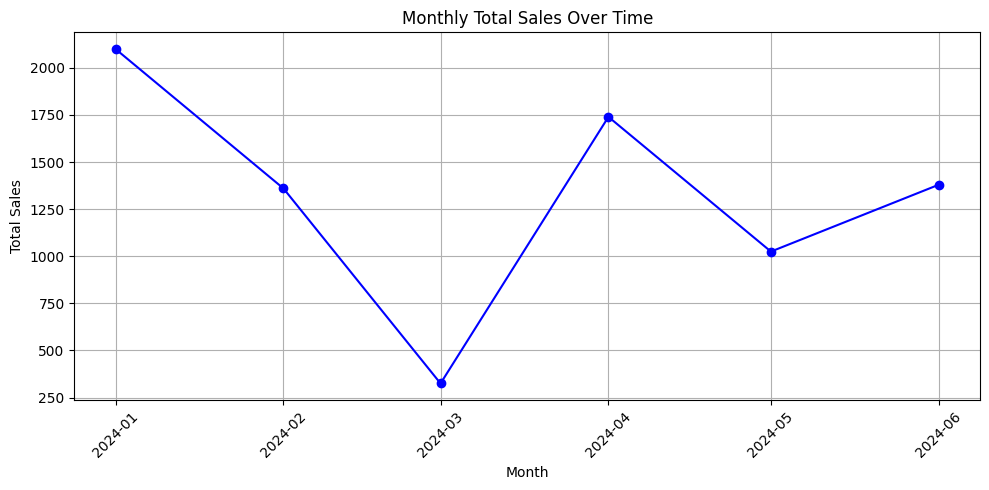

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Total_Amount'], marker='o', color='blue')
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

b. Top 5 Best-Selling Months

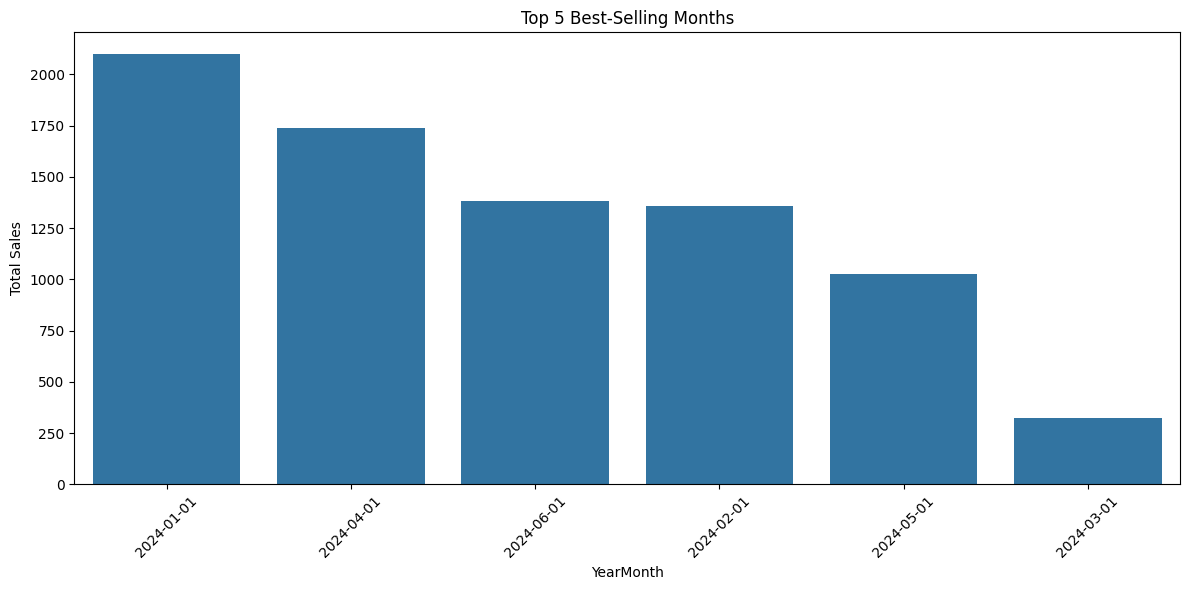

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x= best_selling_months['Month'], y= best_selling_months['Total_Amount'])
plt.title("Top 5 Best-Selling Months")
plt.xlabel("YearMonth")
plt.ylabel("Total Sales")   
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: January 2024 had the highest sales, followed by February 2024. March 2024 recorded the lowest sales.

c. Total Sale revenue by Category

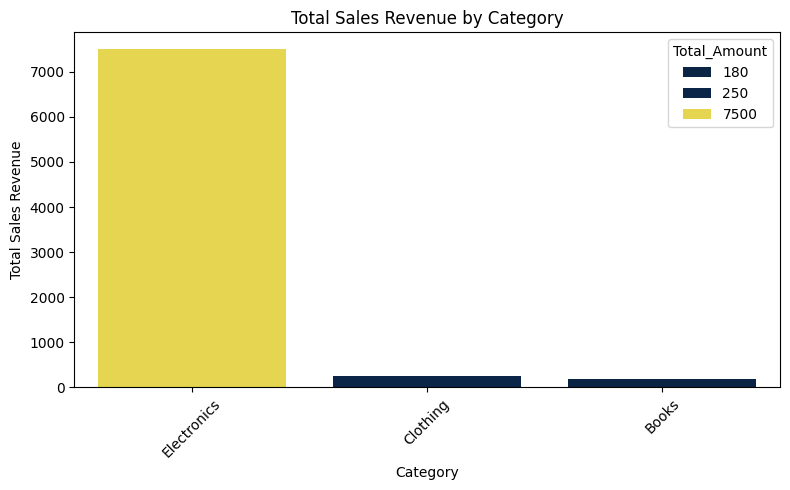

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Total_Amount', data=Category_sales, hue='Total_Amount', palette='cividis')
plt.title("Total Sales Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d. Sale Count by Category

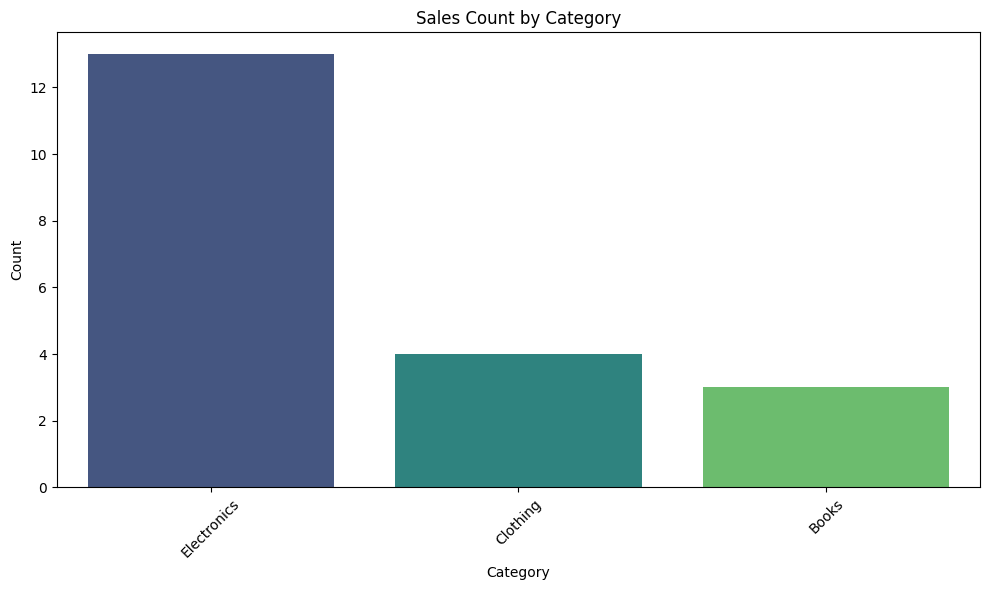

In [41]:
category_counts = sales_data_cleaned['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue= category_counts.index, palette='viridis')
plt.title("Sales Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: The Electronics category had the highest number of sales, followed by Clothing and Books. Electronics accounted for 13 entries, indicating it is the most popular category.

e. HeatMap of Correlation

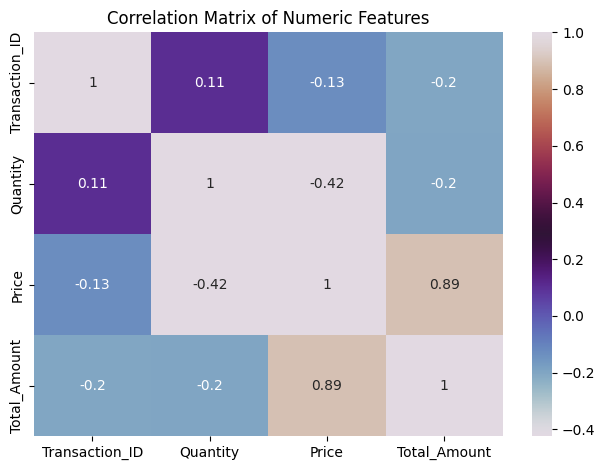

<Figure size 1000x800 with 0 Axes>

In [42]:
sns.heatmap(corr_matrix, annot=True, cmap= 'twilight')
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.figure(figsize=(10, 8))
plt.show()